# Target Encoding

In [2]:
import pandas as pd

autos = pd.read_csv("autos.csv")
autos

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [3]:
autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

autos[["make", "price", "make_encoded"]].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("movielens1m.csv")
df

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,b'4508',25,1,21,b'15701',4
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,b'4167',25,1,21,b'22032',1
1000206,b'593',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'5799',25,1,3,b'80916',5
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3224',25,0,14,b'93428',3


In [9]:
df1= df.astype(np.uint8, errors='ignore')
df1 

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,b'4508',25,1,21,b'15701',4
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,b'4167',25,1,21,b'22032',1
1000206,b'593',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'5799',25,1,3,b'80916',5
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3224',25,0,14,b'93428',3


In [10]:
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [12]:
X = df.copy()
X

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,b'4508',25,1,21,b'15701',4
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,b'4167',25,1,21,b'22032',1
1000206,b'593',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'5799',25,1,3,b'80916',5
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3224',25,0,14,b'93428',3


In [13]:
y = X.pop('Rating')
y

0          5
1          4
2          1
3          5
4          4
          ..
1000204    4
1000205    1
1000206    5
1000207    3
1000208    3
Name: Rating, Length: 1000209, dtype: uint8

In [14]:
X_encode = X.sample(frac=0.25)
X_encode 

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
808148,b'140',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3032',25,1,11,b'47303'
898294,b'348',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'5755',35,0,1,b'78744'
276587,b'903',0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,b'524',18,1,11,b'91320'
302656,b'2872',1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,b'3910',25,1,21,b'91505'
555752,b'1294',0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,b'2872',25,1,21,b'94014'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624574,b'3418',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'5949',18,1,18,b'47901'
160416,b'1207',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3108',50,1,4,b'22039'
918977,b'2028',1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,b'4884',35,1,14,b'90266'
763599,b'3827',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'3938',25,1,1,b'92711-0571'


In [15]:
y_encode = y[X_encode.index]
y_encode 

808148    4
898294    3
276587    5
302656    3
555752    5
         ..
624574    5
160416    5
918977    5
763599    3
11883     5
Name: Rating, Length: 250052, dtype: uint8

In [16]:
X_pretrain = X.drop(X_encode.index)
X_pretrain 

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,b'22307'
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
5,b'2042',0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,b'4957',25,1,1,b'48197'
6,b'2289',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'5294',25,1,1,b'60626'
9,b'1206',0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'3010',25,1,12,b'78759'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,b'2915',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3792',25,1,4,b'68108'
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'4508',25,1,21,b'15701'
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,b'80916'
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3224',25,0,14,b'93428'


In [17]:
y_train = y[X_pretrain.index]
y_train 

1          4
2          1
5          2
6          4
9          4
          ..
1000203    4
1000204    4
1000206    5
1000207    3
1000208    3
Name: Rating, Length: 750157, dtype: uint8

NameError: name 'X_train' is not defined

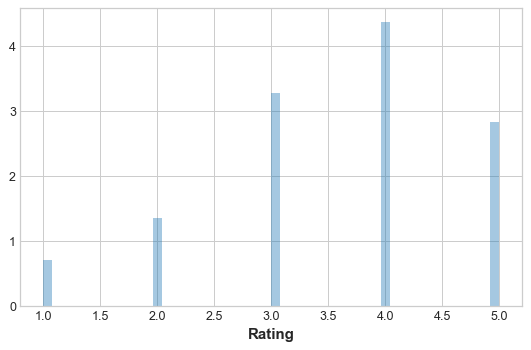

In [20]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);